In [1]:
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.181  Python-3.10.0 torch-2.0.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Setup complete  (8 CPUs, 7.8 GB RAM, 439.1/475.9 GB disk)


In [2]:
!cd C:\workspace\CVwithDL

# Modelo entrenado con dataset propio

In [3]:
!yolo task=pose mode=predict model=C:\workspace\CVwithDL\runs\pose\train2\weights\best.pt conf=0.7 source='C:\workspace\CVwithDL\sample_imgs\99971767.jpg'

Ultralytics YOLOv8.0.181  Python-3.10.0 torch-2.0.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients

image 1/1 C:\workspace\CVwithDL\sample_imgs\99971767.jpg: 384x640 1 person, 180.2ms
Speed: 9.0ms preprocess, 180.2ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\pose\predict3
 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
from matplotlib import pyplot as plt

In [6]:
im = plt.imread("C:\workspace\CVwithDL\runs\pose\predict3\99971767.jpg")
plt.imshow(im)
plt.show()

OSError: [Errno 22] Invalid argument: 'C:\\workspace\\CVwithDL\runs\\pose\\predict3\\99971767.jpg'

## Evaluación

In [ ]:
from IPython.display import display, Image

!cd C:\workspace\CVwithDL
Image(filename='runs\pose\train\confusion_matrix.png')


In [ ]:
Image(filename='/content/runs/detect/train8/results.png')

# Modelo por defecto yolo: COCO completo

### Predicción

In [8]:
!yolo task=pose mode=predict model=yolov8n-pose.pt source='C:\workspace\CVwithDL\sample_imgs\mask5.jpg'

Ultralytics YOLOv8.0.181  Python-3.10.0 torch-2.0.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients

image 1/1 C:\workspace\CVwithDL\sample_imgs\mask5.jpg: 480x640 4 persons, 446.0ms
Speed: 5.2ms preprocess, 446.0ms inference, 8.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\pose\predict
 Learn more at https://docs.ultralytics.com/modes/predict


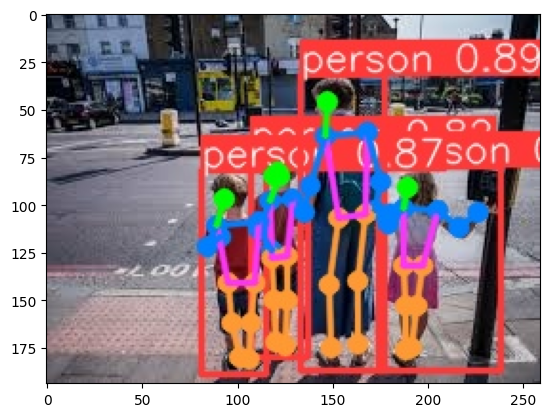

In [9]:
im = plt.imread("runs\pose\predict\mask5.jpg")
plt.imshow(im)
plt.show()

Obtenemos los keypoints en formato numpy array:

In [36]:
# Load a pretrained YOLOv8n-pose Pose model
model = YOLO('yolov8n-pose.pt')

# Run inference on an image
results = model('sample_imgs\mask5.jpg')  # results list

# View results
for r in results:
    print(r.keypoints.xy.numpy())  # print the Keypoints object containing the detected keypoints


image 1/1 c:\workspace\CVwithDL\sample_imgs\mask5.jpg: 480x640 4 persons, 279.1ms
Speed: 3.0ms preprocess, 279.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


[[[     142.62      48.633]
  [     143.57      45.849]
  [     144.73      45.734]
  [     147.47      46.922]
  [     156.62      45.833]
  [     146.77      64.391]
  [     168.72      62.169]
  [     138.61      90.165]
  [     175.08      88.814]
  [      135.5       104.4]
  [     172.01      103.93]
  [     153.15      107.17]
  [     167.49      105.64]
  [     148.87      142.86]
  [     163.54      140.93]
  [     149.02      175.45]
  [     163.12      173.27]]

 [[     90.733      97.651]
  [     91.661      95.569]
  [     92.675      95.043]
  [      93.24       97.37]
  [     102.13       95.94]
  [      89.56      111.55]
  [     111.19      109.99]
  [     84.703      122.24]
  [     114.68      123.89]
  [     91.603         118]
  [     112.46      128.11]
  [     95.021      141.71]
  [      109.4      141.04]
  [     97.376      162.51]
  [     107.05      162.16]
  [     101.02      180.26]
  [     106.33      181.22]]

 [[     189.21      89.783]
  [     189.86  

Info de los keypoints predichos:

In [30]:
num_keyp = len(results[0].keypoints.xy.numpy()[0])
num_per = len(results[0].keypoints.xy.numpy())
keypoints = results[0].keypoints.xy.numpy()
print("numero de keypoints: ", num_keyp)
print("numero de personas detectadas: ", num_per)

for keypoint in range(0,num_per):
    print("keypoint n° ",keypoint+1,": ",keypoints[keypoint])






numero de keypoints:  17
numero de personas detectadas:  4
keypoint n°  1 :  [[     142.62      48.633]
 [     143.57      45.849]
 [     144.73      45.734]
 [     147.47      46.922]
 [     156.62      45.833]
 [     146.77      64.391]
 [     168.72      62.169]
 [     138.61      90.165]
 [     175.08      88.814]
 [      135.5       104.4]
 [     172.01      103.93]
 [     153.15      107.17]
 [     167.49      105.64]
 [     148.87      142.86]
 [     163.54      140.93]
 [     149.02      175.45]
 [     163.12      173.27]]
keypoint n°  2 :  [[     90.733      97.651]
 [     91.661      95.569]
 [     92.675      95.043]
 [      93.24       97.37]
 [     102.13       95.94]
 [      89.56      111.55]
 [     111.19      109.99]
 [     84.703      122.24]
 [     114.68      123.89]
 [     91.603         118]
 [     112.46      128.11]
 [     95.021      141.71]
 [      109.4      141.04]
 [     97.376      162.51]
 [     107.05      162.16]
 [     101.02      180.26]
 [     106.33

## Predicción webcam:

In [ ]:
# Run inference on webcam
results = model(source=0, show=True, conf=0.3, save=True)  # results list
keypoints = results[0].keypoints.xy.numpy()
print(keypoints)


In [5]:
keypoints = results[0].keypoints.xy.numpy()
print(len(keypoints))

4
